In [1]:
import limb
import pandas as pd
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
gaitdata=pd.read_csv('interpolated_data.csv', sep=',')

In [3]:
time=gaitdata.loc[:,"TIME"]

In [4]:
len(Ry)

NameError: name 'Ry' is not defined

In [16]:
anthdat=limb.AnthroData(54.5,170)

In [17]:
ls=anthdat[8]/100
lt=anthdat[4]/100
#lh=
lf=anthdat[12]/100
lcs=anthdat[9]/100
lct=anthdat[5]/100
#lch=
lcf=anthdat[13]/100
If=anthdat[14]
Is=anthdat[10]
#Ih=
It=anthdat[6]
mf=anthdat[11]
ms=anthdat[7]
#mh=
mt=anthdat[3]

In [18]:
Txp=gaitdata.loc[:,"M000Y"]
Typ=gaitdata.loc[:,"M000Z"]
Mxp=gaitdata.loc[:,"M001Y"]
Myp=gaitdata.loc[:,"M001Z"]
Axp=gaitdata.loc[:,"M003Y"]
Ayp=gaitdata.loc[:,"M003Z"]
Kxp=gaitdata.loc[:,"M004Y"]
Kyp=gaitdata.loc[:,"M004Z"]
Hxp=gaitdata.loc[:,"M005Y"]
Hyp=gaitdata.loc[:,"M005Z"]

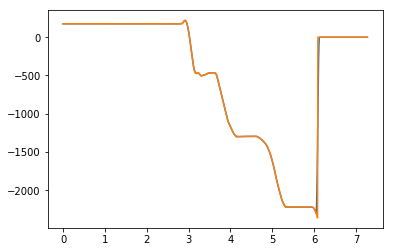

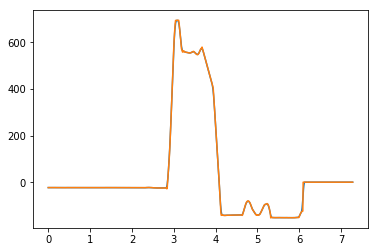

In [19]:
Tp=[limb.filterdata(Txp,5),limb.filterdata(Typ,5)]
plt.plot(time,Tp[0]),plt.plot(time,Txp)
plt.show()
plt.plot(time,Tp[1]),plt.plot(time,Typ)
plt.show()

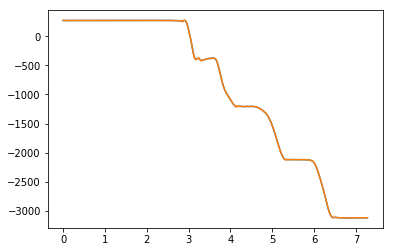

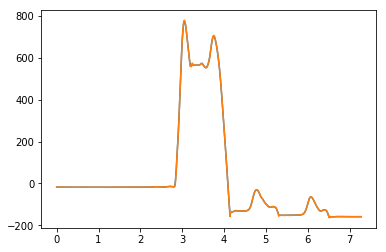

In [20]:
Mp=[limb.filterdata(Mxp,5),limb.filterdata(Myp,4)]
plt.plot(time,Mp[0]),plt.plot(time,Mxp)
plt.show()
plt.plot(time,Mp[1]),plt.plot(time,Myp)
plt.show()

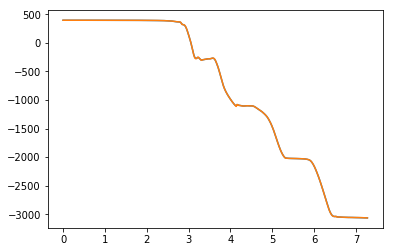

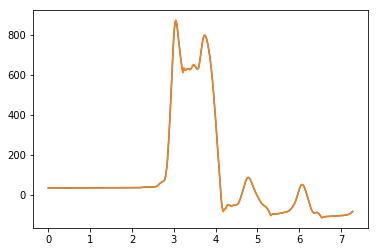

In [21]:
Ap=[limb.filterdata(Axp,5),limb.filterdata(Ayp,4)]
plt.plot(time,Ap[0]),plt.plot(time,Axp)
plt.show()
plt.plot(time,Ap[1]),plt.plot(time,Ayp)
plt.show()

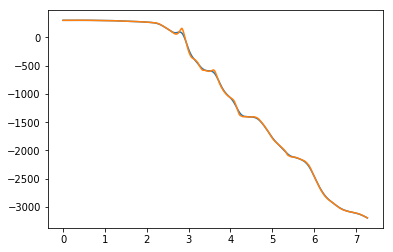

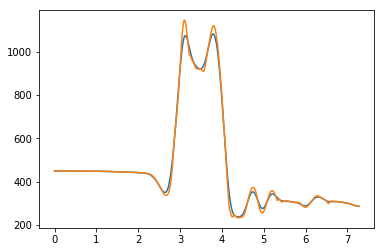

In [22]:
Kp=[limb.filterdata(Kxp,20),limb.filterdata(Kyp,20)]
plt.plot(time,Kp[0]),plt.plot(time,Kxp)
plt.show()
plt.plot(time,Kp[1]),plt.plot(time,Kyp)
plt.show()

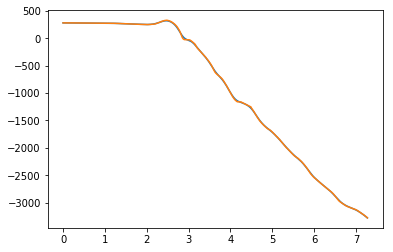

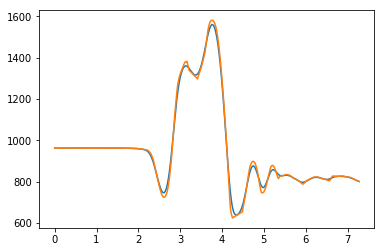

In [23]:
Hp=[limb.filterdata(Hxp,20),limb.filterdata(Hyp,20)]
plt.plot(time,Hp[0]),plt.plot(time,Hxp)
plt.show()
plt.plot(time,Hp[1]),plt.plot(time,Hyp)
plt.show()

In [24]:
Body=[limb.BodyPart(lf,mf,lcf,If,Tp,Mp),limb.BodyPart(ls,ms,lcs,Is,Ap,Kp),limb.BodyPart(lt,mt,lct,It,Kp,Hp)]
limb.BodyPart.time=time

In [25]:
GRFdata=pd.read_csv('interpolated_data.csv',sep=',')

In [26]:
Rx=GRFdata.loc[:,"Fy"]
Ry=-GRFdata.loc[:,"Fz"]

In [27]:
Rx=limb.filterdata(Rx,2)
Ry=limb.filterdata(Ry,2)

In [28]:
len(Rx)

874

The Inverse dynamics analysis is done by segmenting the body into foot, shank, thigh and the upper body is considered to be a lumped mass at the centre of mass of the upper body

*add the fbd of the whole body*

consider the foot

*add the fbd of the foot*

The kinetic diagram of the foot is as shown

*add kinetic diagram of the foot*

*add the equations here*

In [29]:
F=[Rx,Ry]
T=np.zeros(874)
R=[[np.zeros(874),np.zeros(874)],[np.zeros(874),np.zeros(874)],[np.zeros(874),np.zeros(874)]]
M=[np.zeros(874),np.zeros(874),np.zeros(874),np.zeros(874)]
for i in range(0,3):
    F,T=Body[i].Forces(F,T)
    R[i]=F
    M[i]=T

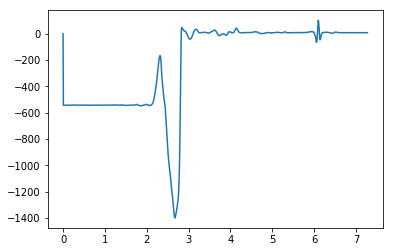

In [30]:
plt.plot(time,R[0][1])


Consider the shank

*add FBD of shank*

*add kinetic diagram*

consider the thigh

*add FBD of thigh*

*add kinetic diagram*

In [31]:
def aCoM(m1,a1,m2,a2,m3,a3,m4,a4):
    acom=[np.zeros(874),np.zeros(874)]
    F=[np.zeros(874),np.zeros(874)]
    for i in range(0,2):
        for j in range(0,874):
            acom[i][j]=(m1*a1[i][j]+m2*a2[i][j]+m3*a3[i][j]+m4*a4[i][j])/(m1+m2+m3+m4)
            F[i][j]=(m1+m2+m3+m4)*(9.81+acom[i][j])
    return F

In [32]:
F=aCoM(Body[0].mass,Body[0].accelCoM,Body[1].mass,Body[1].accelCoM,Body[2].mass,Body[2].accelCoM,54.5-Body[0].mass-Body[1].mass-Body[2].mass,Body[2].accelProxim)


In [ ]:
#filter the Joint forces and moments
#find the joint angles and joint omegas.

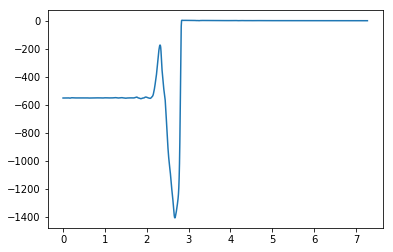

In [33]:
plt.plot(time,Ry)

([<matplotlib.lines.Line2D at 0x7e1637edd8>],
 [<matplotlib.lines.Line2D at 0x7e1637eef0>])

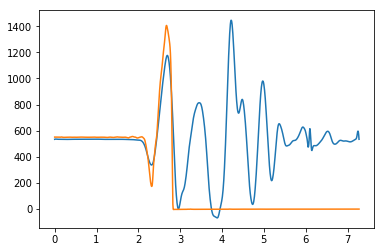

In [35]:
plt.plot(time,F[1]),plt.plot(time,-Ry)

In [ ]:
Power_A=limb.filterdata(Power_A,5)
plt.plot(time,Power_A)

In [ ]:
Power_K=limb.filterdata(Power_K,3)
plt.plot(time,Power_K)

In [ ]:
Power_H=limb.filterdata(power_H,3)
plt.plot(time,Power_H)